# Probability Density Function

In previous topics, we worked on data set that can be counted or __discrete variables__. For example weight in pound and oz not in kilogram, number babies or incomes. 

There is other data that we cannot count but measure such time, length, temperature or __continous random variable__. 

## Review Discrete variable

From student in this room,

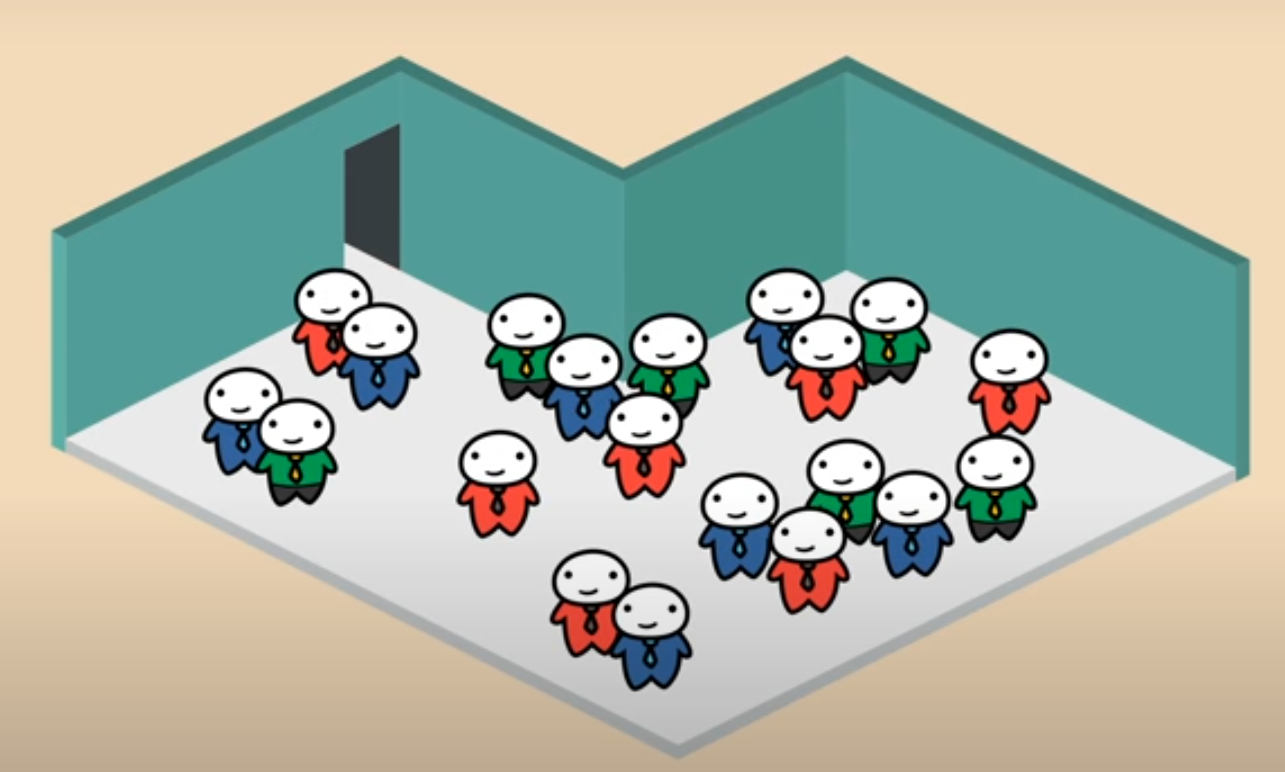

 we can create frequency table out of counting them.

 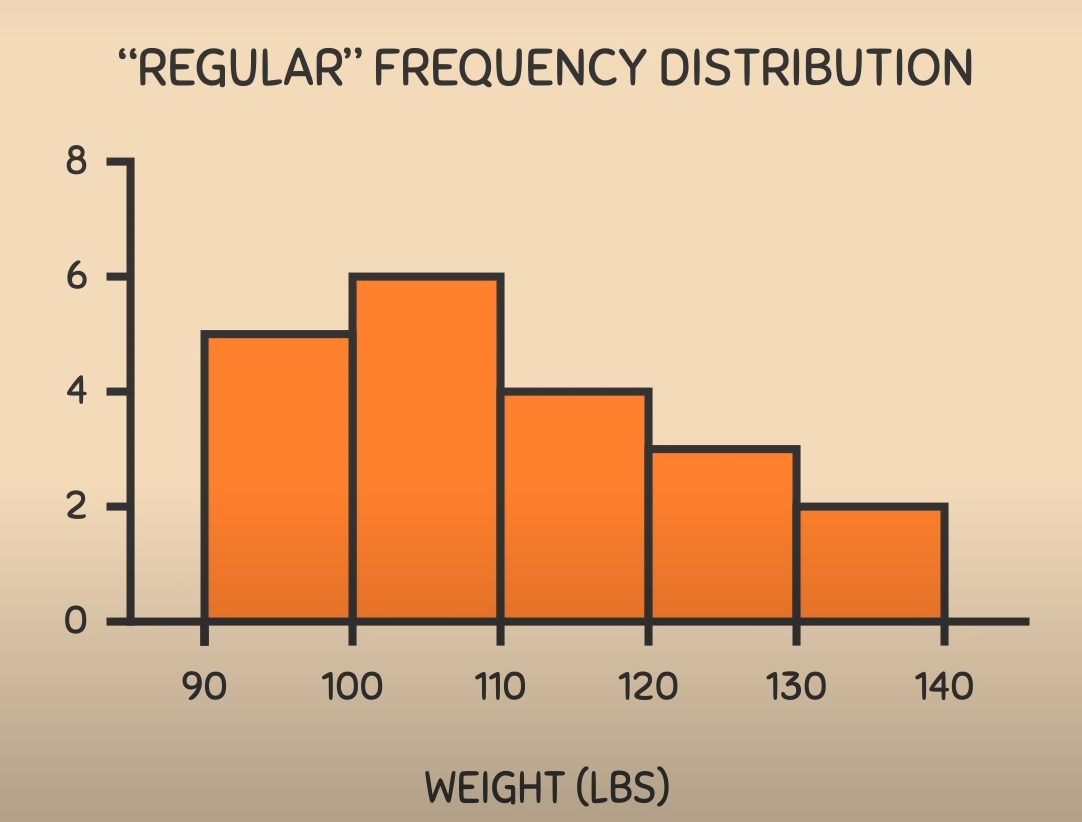

Normalized Frequency Distribution or Relative Frequency Distribution can be represent as PMF or Probablidity Mass function for the discreate random variable:- 

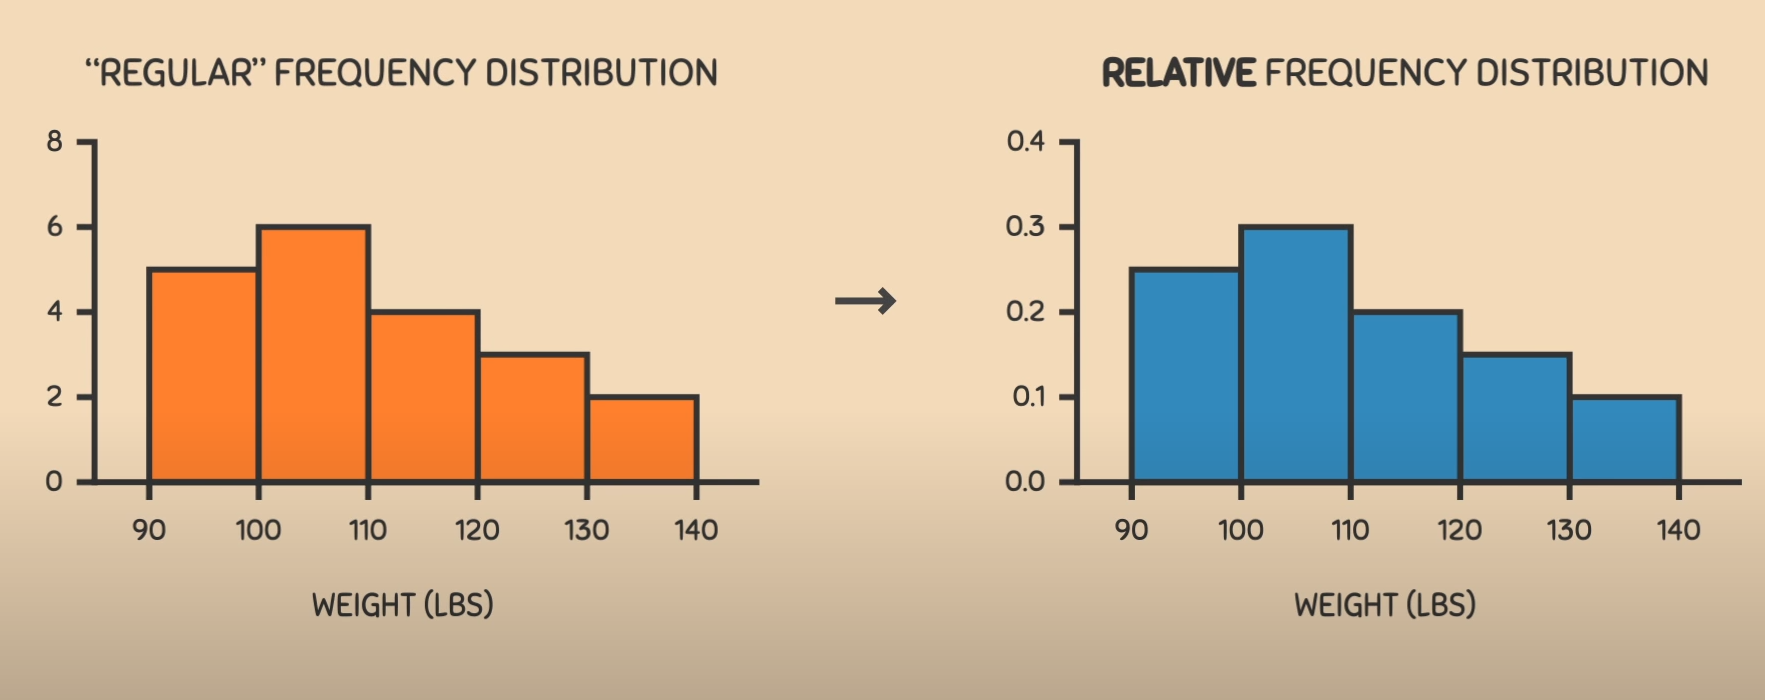

So we generalized frequency distribution for any size od data to probability or percentage:-

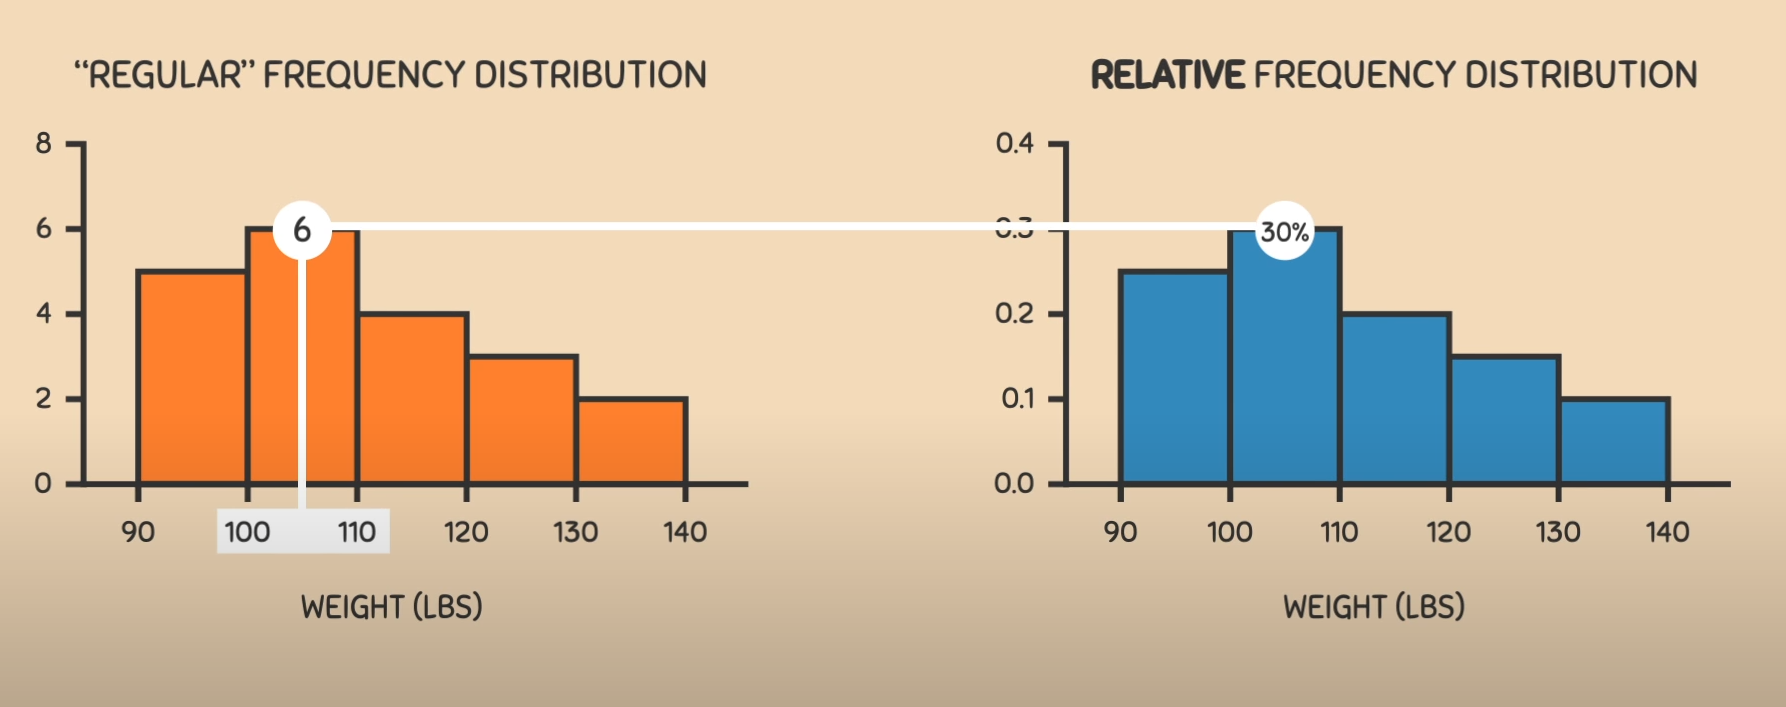

In discreate random variable we know size of data set or it has finit size and values.  To convert frequency distribution to probablity distribution we devided each counting values by size of sample.

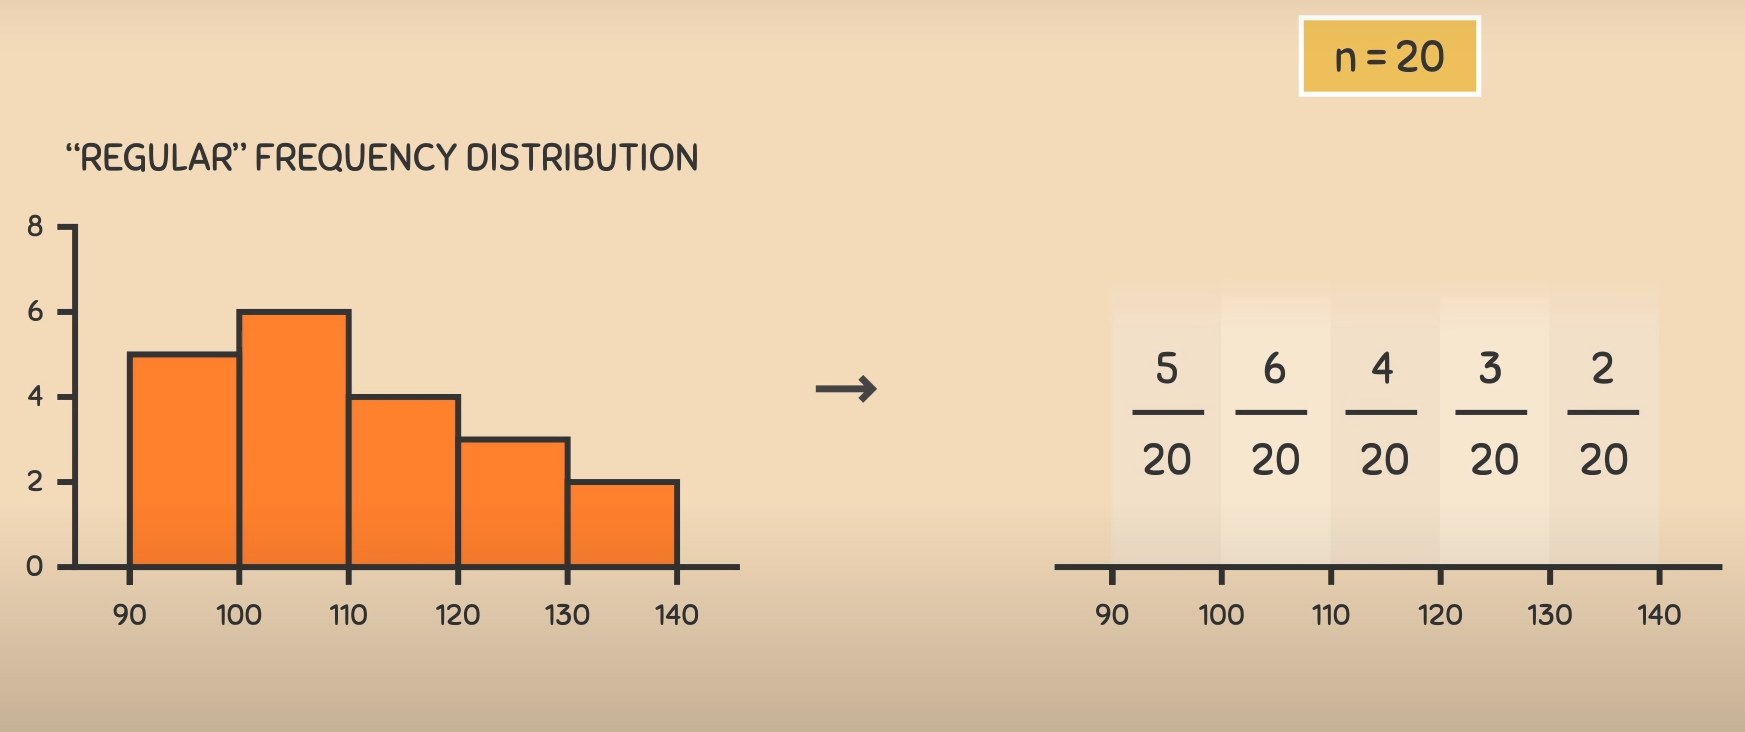

The total area of probability is added up to 1 
or 100%.

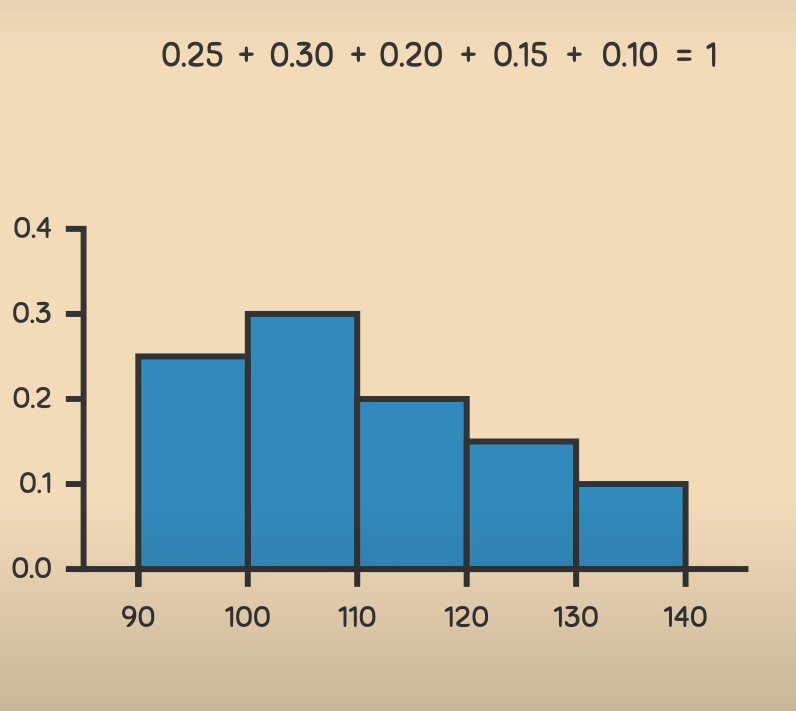

#### Using Density Curve for discrete random variable

When data set is large, we can approximate PMF with __density function__

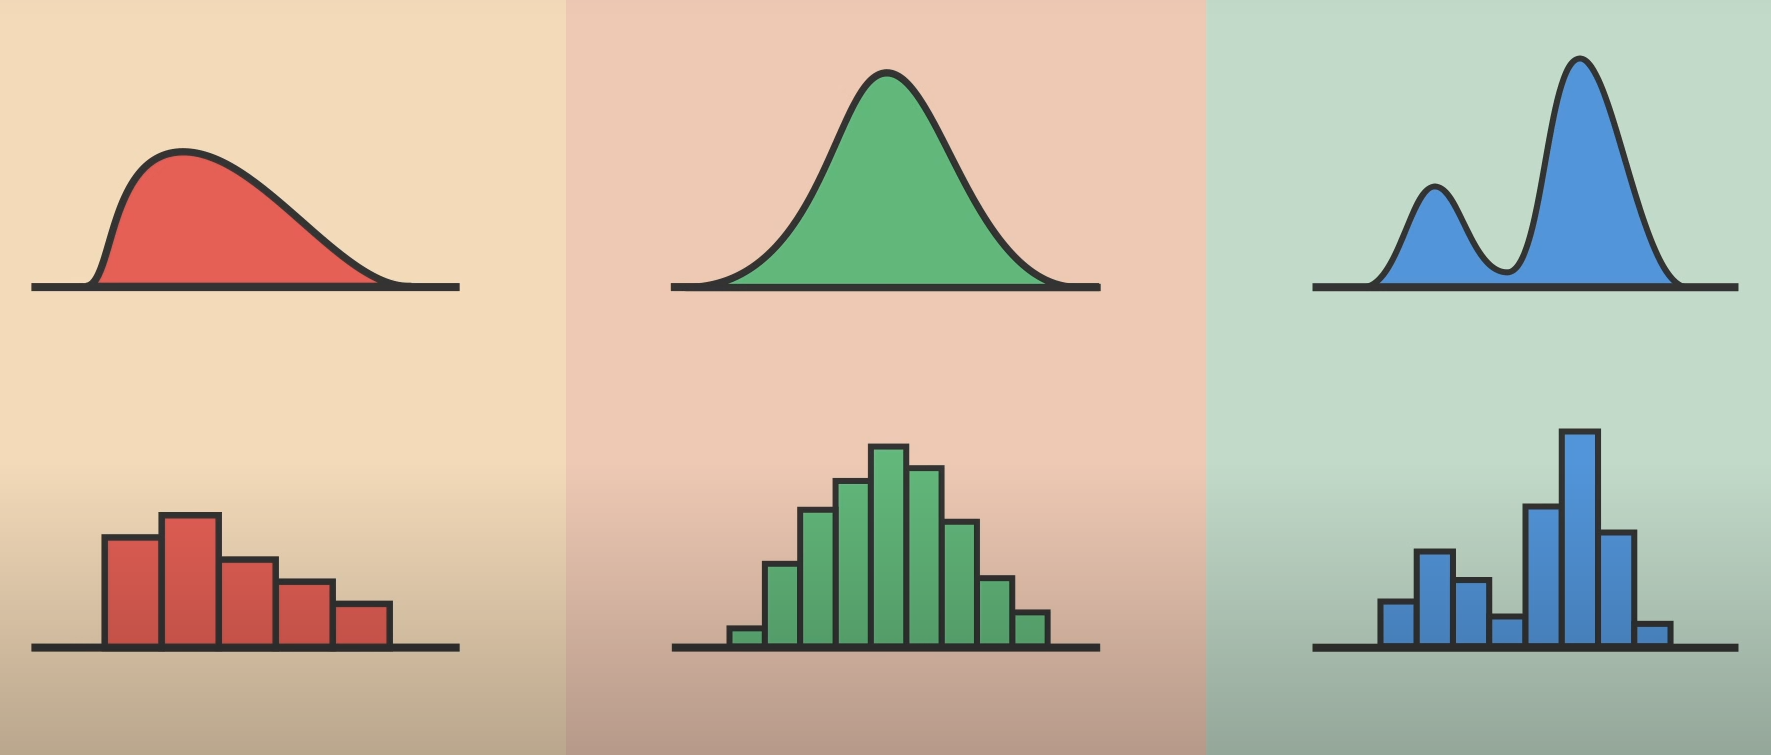

Total area of density curve is added up to 1.

### Why not use on PMF?
- PDF or denisity curve give us overall picture of distribution
- PDF is not depend size of interval, so it is gerneralized
- For large data set, PMF is model by PDF
- We can use Calculus to work on PDF easy.

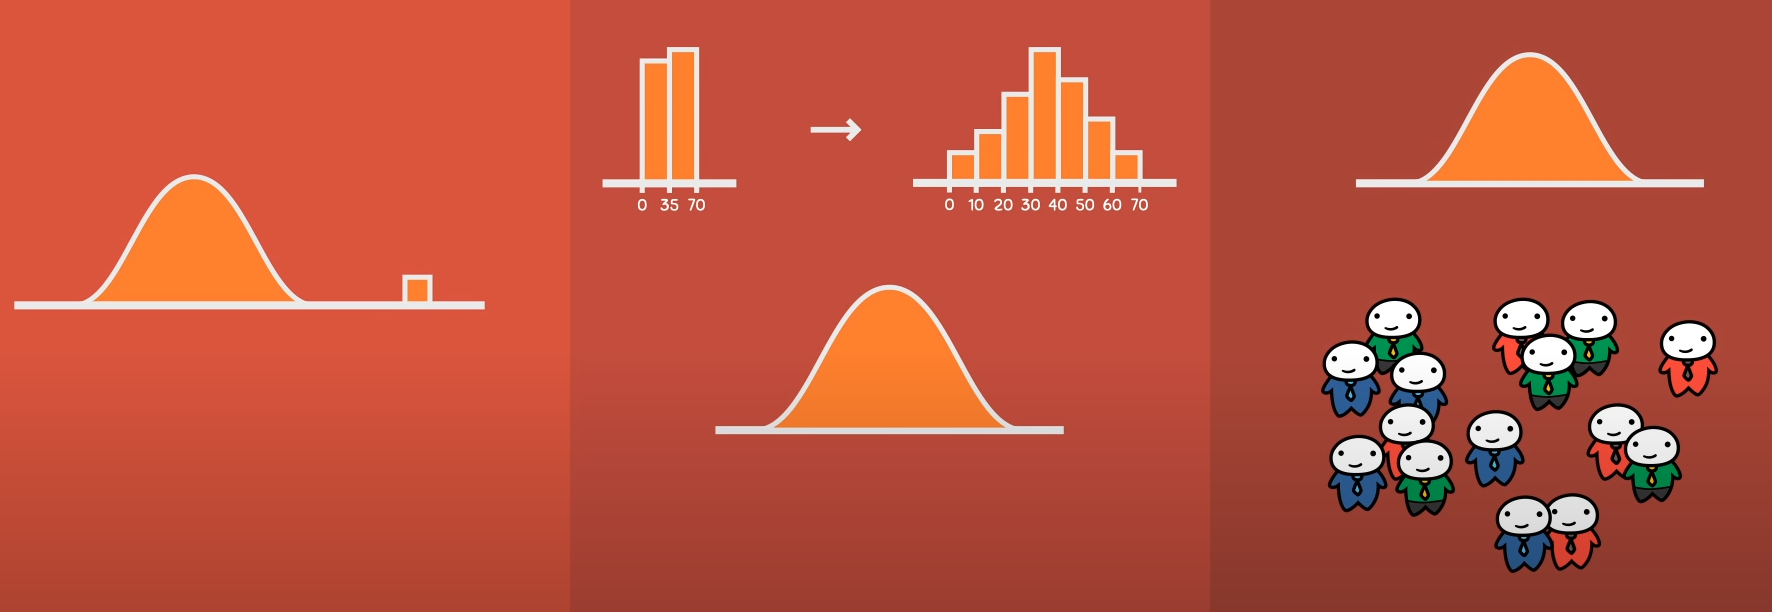

Which cases density curve is not accurate enough?

#### Properties of Denisity Curves
- A density curve must lie on or above the horizontal axis
- The total area under the curve is always equal to 1.


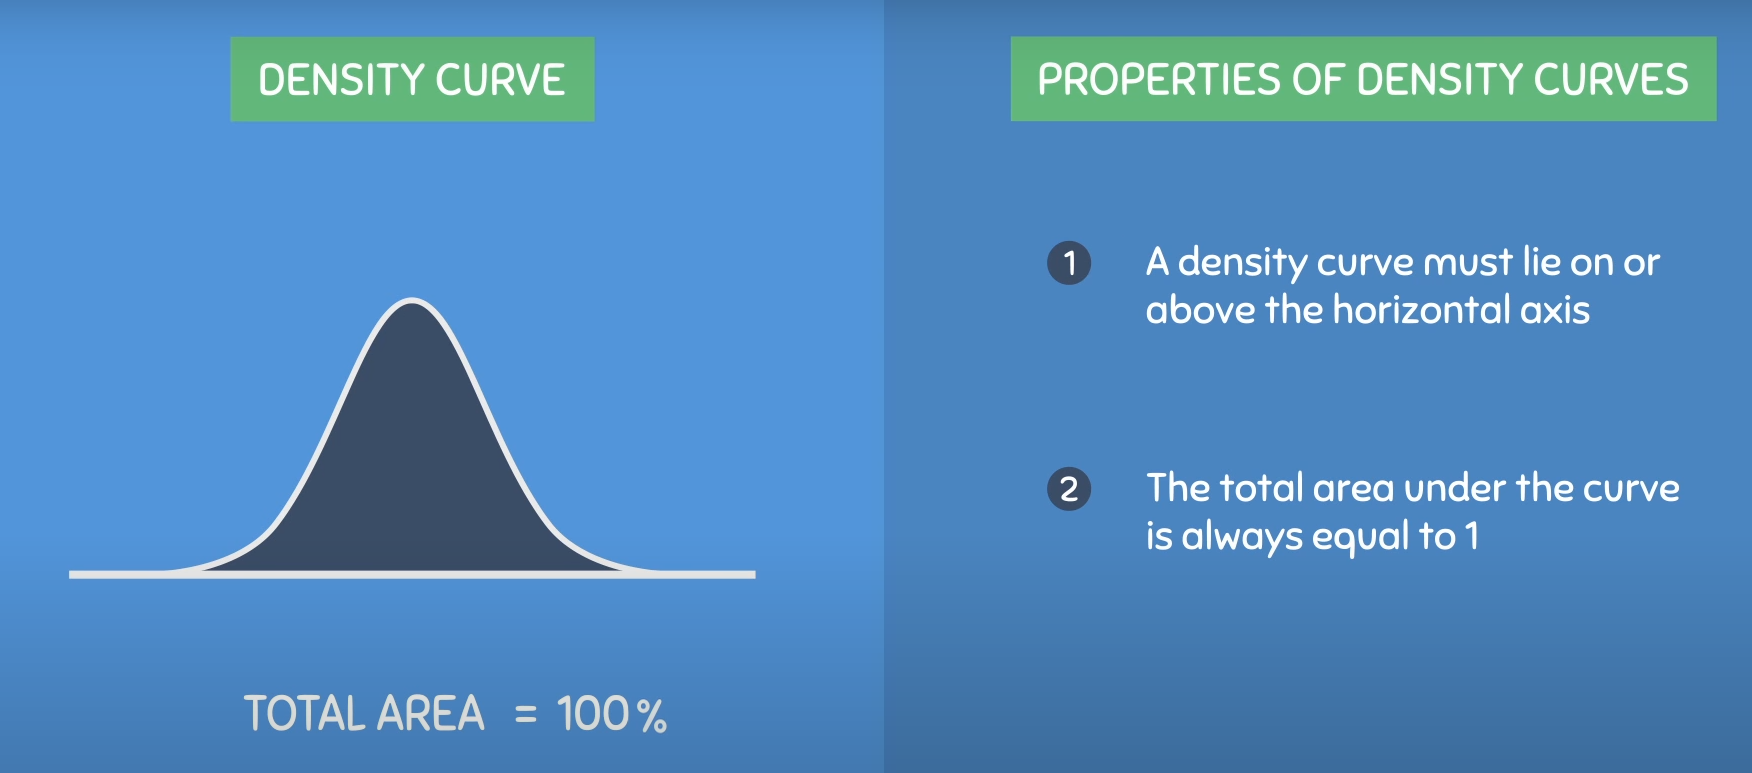

# Measuring data and continuous random variable

The follow idea behind __Probability Density Function is not probability but density__. 

Like physics, __density is mass per unit of volume__; in order to get a mass, you
have to multiply by volume or, __if the density is not constant, you have to
integrate over volume__.

Similarly, probability density measures probability per unit of x. In order
to get a probability mass, you have to integrate over x.


Question to check our understanding about density curve

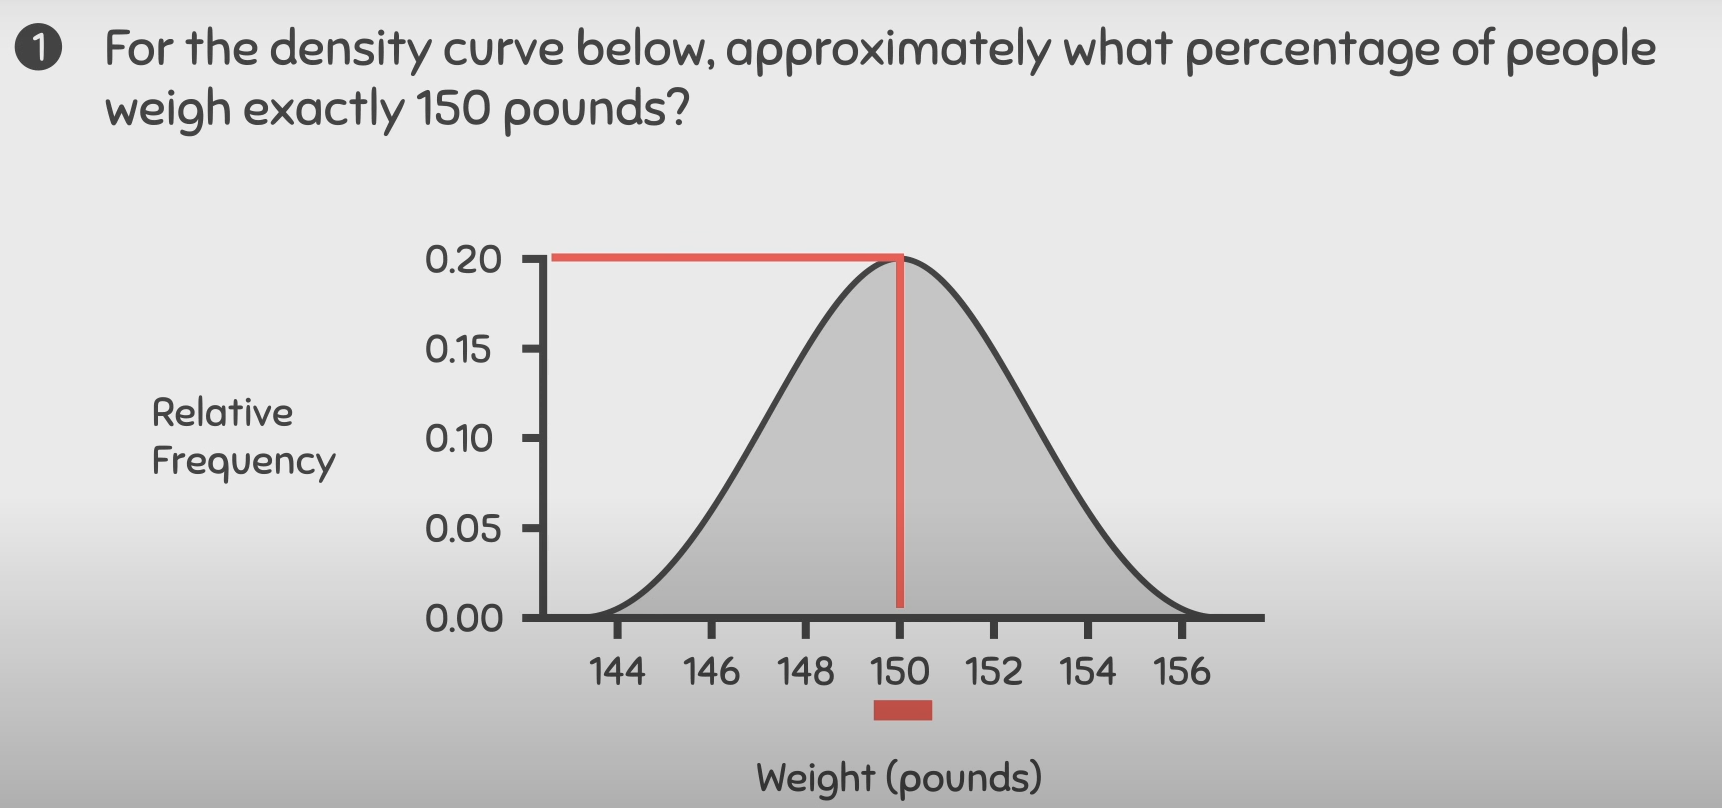

Is it 20%?

Because total area under curve is 1, line width is zero so at point 150 pound where area of the line is zero.

Since we can go to any precision you want to such 150, 150.00001, 150.0000000000000001.... and so on. No exact weight if we measure infinite precision, no probability at one point in continous random variable.

## Probablity as denisty of interval

With out integral, we can approximate probability with litter bit of math

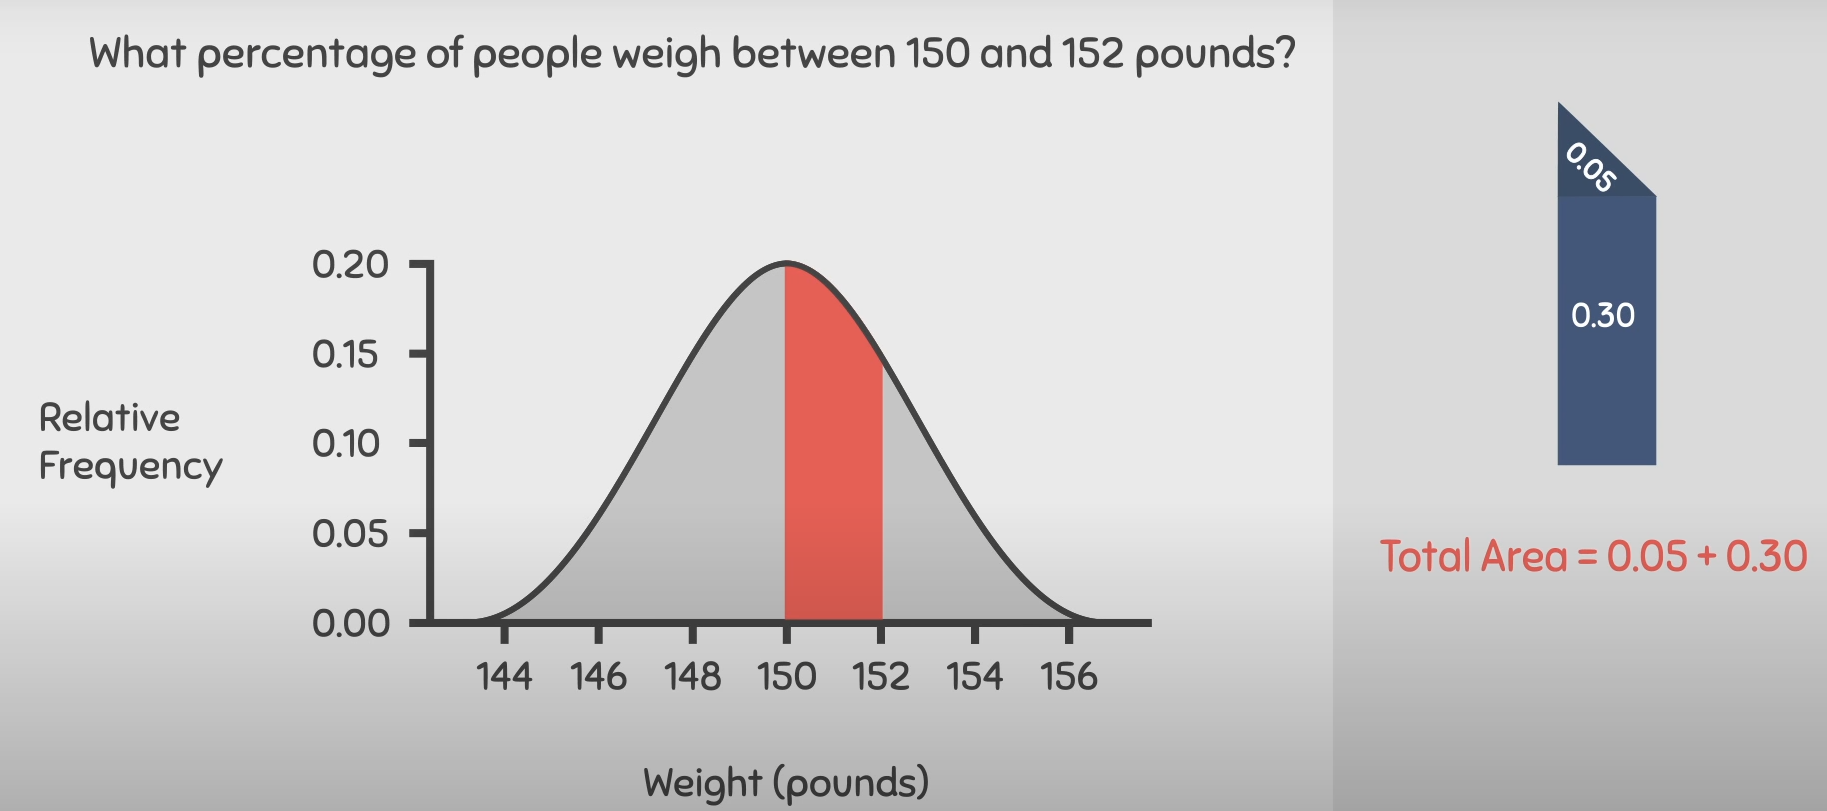

## Compute probablity for Norm distribution

The __probability density function is a derivative of the Cumulattive Distribution Function__, which characterizes the density with which the values of the random variable are distributed at a given point.

$$ 
    f(x) = F'(x) = \lim_{\Delta x \to 0} \frac{F(x+\Delta x) - F(x)} {\Delta x}
$$ 
where:-
    
    * f(x) is Probability density function and
    
    * F(x) is Cumulative distribution function

If we have distribution function only we also can find the probability of falling into the interval.

$$
    P(x < X < x+ \Delta x) := F(x+\Delta x) - F(x)
$$

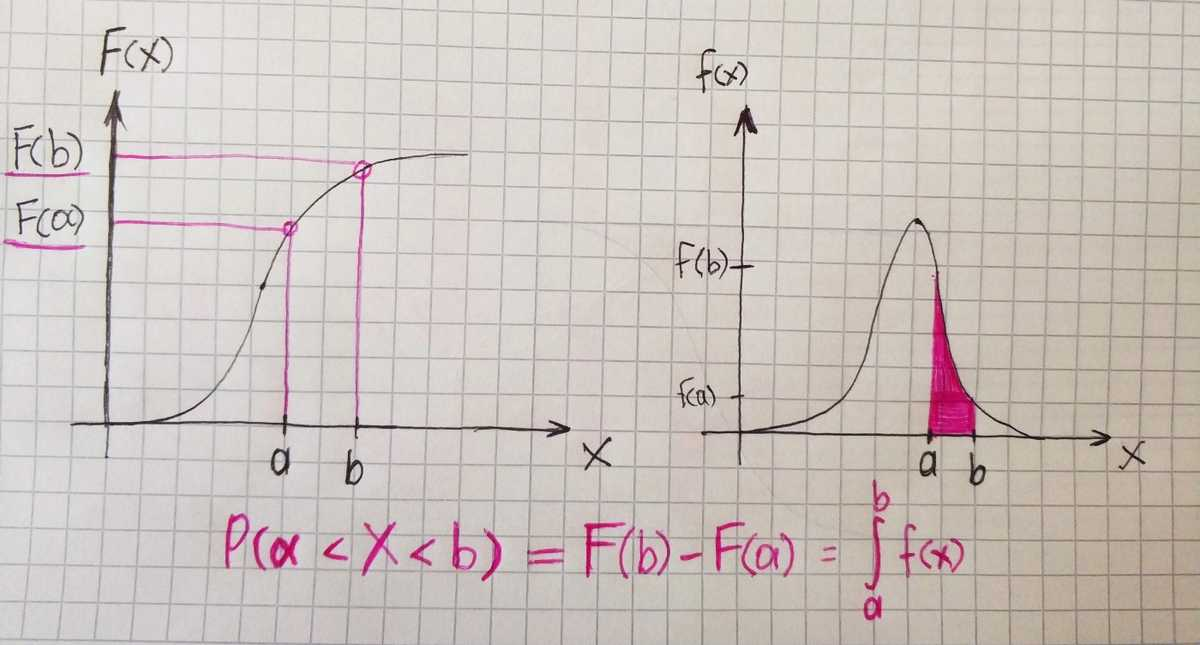

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.integrate as integrate

# define interval of interest
x1 = 150
x2 = 152

print('probability to fall between {0} and {1} :'.format(x1, x2), integrate.quad(norm.pdf, x1, x2 ,args=(150,2))[0])
step = 0.001


whole_x = np.arange(143, 157, step)
whole_y = norm(150,2).pdf(whole_x)

needed_x = np.arange(x1, x2, step)
needed_y =  norm(150,2).pdf(needed_x)

plt.plot(whole_x, whole_y)
plt.fill_between(needed_x, needed_y)

Now we’ll learn another way: a probability density function, or PDF. The norm function, which we used to compute the normal CDF, can also compute the normal PDF:

In [ ]:
xs = np.linspace(-3, 3)
ys = norm(0,1).pdf(xs)
plt.plot(xs, ys, color='gray', label='Normal PDF')

plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Normal density function')
plt.legend();

The normal PDF is the classic “bell curve”.

It is tempting to compare the PMF of the data to the PDF of the normal distribution, but that doesn’t work. Let’s see what happens if we try:

In [ ]:
%pip install empiricaldist

In [ ]:
from empiricaldist import Pmf

sample = np.random.normal(size=1000)

plt.plot(xs, ys, color='gray', label='Normal PDF')

pmf_sample = Pmf.from_seq(sample)
pmf_sample.plot(label='Random sample')

plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Normal density function')
plt.legend();

The PMF of the sample is a flat line across the bottom. In the random sample, every value is unique, so they all have the same probability, one in 1000.


## kernel density estimation

Kernel density estimation (__KDE__) is an __algorithm that takes a sample
and finds an appropriately smooth PDF that fits the data__. 

For more detail at http://en.wikipedia.org/wiki/Kernel_density_estimation.

If we have the points in the sample, __we can estimate the PDF of the distribution they came from__. 

This process is called __kernel density estimation, or KDE__. 


It’s a way of getting from a PMF, a probability mass function, to a PDF, a probability density function.



__To generate a KDE plot__, we’ll use the __Seaborn library__, 

__import as sns__. 

Seaborn provides __kdeplot__, which __takes the sample, estimates the PDF, and plots it__.

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns

sns.kdeplot(sample, label='Estimated sample PDF')

plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Normal density function')
plt.legend();

Now we can compare the KDE plot and the normal PDF.

In [ ]:
plt.plot(xs, ys, color='gray', label='Normal PDF')
sns.kdeplot(sample, label='Estimated sample PDF')

plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Normal density function')
plt.legend();

#### Estimating a density function with KDE is useful for several purposes:

• __Visualization__: During the exploration phase of a project, CDFs are
usually the best visualization of a distribution. After you look at a
CDF, you can decide whether an estimated PDF is an appropriate
model of the distribution. If so, it can be a better choice for presenting
the distribution to an audience that is unfamiliar with CDFs.

• __Interpolation__: An estimated PDF is a way to get from a sample to
a model of the population. If you have reason to believe that the
population distribution is smooth, you can use KDE to interpolate the
density for values that don’t appear in the sample.

• __Simulation__: Simulations are often based on the distribution of a sample.
If the sample size is small, it might be appropriate to smooth the sample
distribution using KDE, which allows the simulation to explore more
possible outcomes, rather than replicating the observed data.

##  The distribution framework

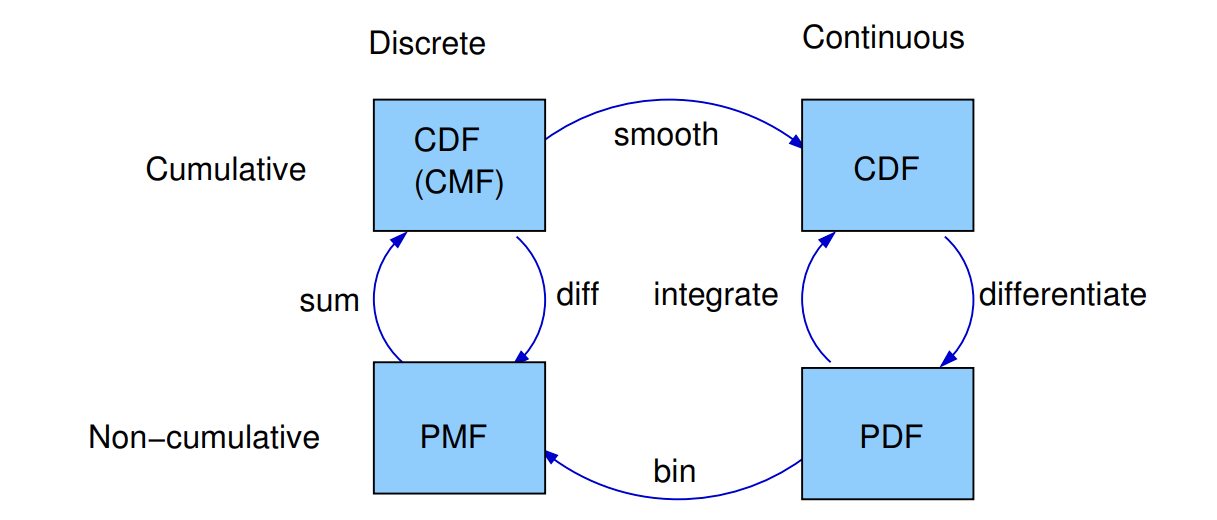

We started with PMFs.
To get from a __PMF to a CDF__, you __add up the probability masses to
get cumulative probabilities__. 


To get __from a CDF back to a PMF__, you __compute differences in cumulative probabilities++. 

__PDF is the derivative of a continuous CDF__; or, equivalently, 
 CDF is the integral of a PDF.

#### To get __from a discrete to a continuous distribution__,

* assume that the data come from an analytic continuous distribution (like exponential or normal) and
to estimate the parameters of that distribution. That is last week.

* Another option is kernel density estimation, today.


To discretizing, or quantizing:
If you __evaluate a PDF at discrete points__, you can generate a PMF that is an approximation of
the PDF.

You can get a better __approximation using numerical integration__.


### Demostrate the Framework

In [ ]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [ ]:
import numpy as np

import thinkstats2
import thinkplot

I'll start with the data from the BRFSS data set.

In [ ]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/brfss.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/CDBRFS08.ASC.gz")

In [ ]:
import brfss

df = brfss.ReadBrfss(nrows=None)

Here are the mean and standard deviation of female height in cm.

In [ ]:
female = df[df.sex==2]
female_heights = female.htm3.dropna()
mean, std = female_heights.mean(), female_heights.std()
mean, std

NormalPdf returns a Pdf object that represents the normal distribution with the given parameters.

Density returns a probability density, which doesn't mean much by itself.

In [ ]:
pdf = thinkstats2.NormalPdf(mean, std)
pdf.Density(mean + std)

thinkplot provides Pdf, which plots the probability density with a smooth curve.

In [ ]:
thinkplot.Pdf(pdf, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF', xlim=[140, 186])

Pdf provides MakePmf, which returns a Pmf object that approximates the Pdf.

In [ ]:
pmf = pdf.MakePmf()
thinkplot.Pmf(pmf, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF', xlim=[140, 186])

If you have a Pmf, you can also plot it using Pdf, if you have reason to think it should be represented as a smooth curve.

In [ ]:
thinkplot.Pdf(pmf, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF', xlim=[140, 186])

Using a sample from the actual distribution, we can estimate the PDF using Kernel Density Estimation (KDE).

If you run this a few times, you'll see how much variation there is in the estimate.

In [ ]:
thinkplot.Pdf(pdf, label='normal')

sample = np.random.normal(mean, std, 500)
sample_pdf = thinkstats2.EstimatedPdf(sample, label='sample')
thinkplot.Pdf(sample_pdf, label='sample KDE')
thinkplot.Config(xlabel='x', ylabel='PDF', xlim=[140, 186])

References and Sources:
1. https://www.youtube.com/watch?v=Txlm4ORI4Gs
2. Probability Density Function With Python
    https://radzion.com/blog/probability/density
3. ThinkStat 2 
    https://github.com/AllenDowney/ThinkStats2